# Traffic Light Classifier
## Demonstration notebook

## Imports
### Set imports relative to this file
If notebook is not in curent working directory path must be set

In [17]:
import os
import sys
# Get current working directory
cwd = os.path.abspath(os.path.join('..'))
# print("Is this the module path?", cwd)
MODULE_NAME = 'traffic_light_classifier'
# Check if current working directory is likely correct
cwd_folder = os.path.basename(os.path.normpath(cwd))
if cwd_folder == MODULE_NAME:
    module_path = cwd
else:
    # This must be set by the user
    module_path = "C:\\Users\\willhunt88\\OneDrive\\Documents\\Programming\\Udacity Intro to Self Driving Cars\\Project 6 - Traffic Light Classifier\\traffic_light_classifier"

# Add module to system path
if module_path not in sys.path:
    sys.path.append(module_path)

In [18]:
import helpers
from test_classifier import Tests
from traffic_light_classifier import TrafficLightClassifier
%matplotlib inline

### Load training set to view
Import directories defined
Images loaded and checked

In [19]:
IMAGE_DIR_TRAINING = "traffic_light_images/training/"
IMAGE_DIR_TEST = "traffic_light_images/test/"
dirs = [IMAGE_DIR_TRAINING, IMAGE_DIR_TEST]
keys = ['training', 'test']

IMAGE_LIST = {}
for directory, key in zip(dirs, keys):
    path_images = os.path.join(module_path, directory)
    IMAGE_LIST[key] = helpers.load_dataset(path_images)
    n_images = len(IMAGE_LIST[key])
    if n_images == 0:
        print("No images loaded from {0} set".format(key))
    else:
        print("Loaded {0} images from {1} set".format(n_images, key))

Loaded 1187 images from training set
Loaded 297 images from test set


### Initialise classifier class

In [20]:
tlc_training = TrafficLightClassifier(IMAGE_LIST['training'])

### Inspect images visually
Plot a random sample of images

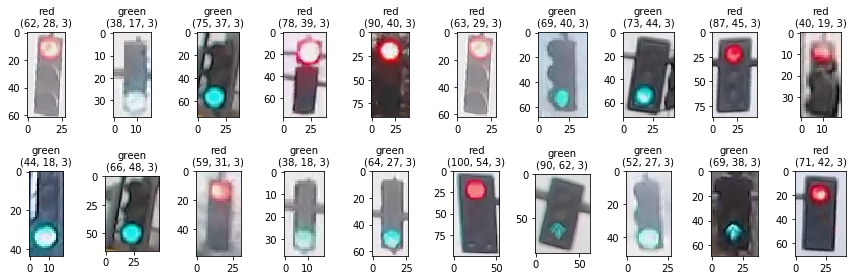

In [21]:
tlc_training.visualize_image_sample(n_plots=20, randomize=True)

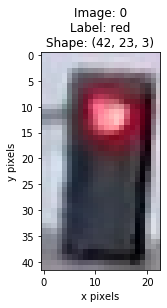

In [22]:
image_index = 0
tlc_training.visualize_image(image_index)

Take a look at standardized version of image

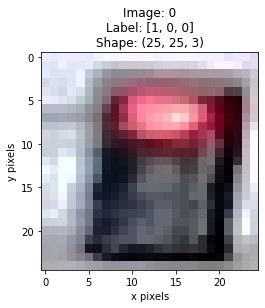

In [23]:
tlc_training.visualize_image(image_index, list_name='standardized')

Take a look at masked version

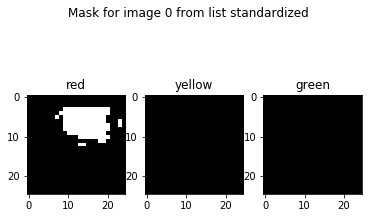

In [24]:
tlc_training.visualize_masks(image_index)

### Look at misclassfied images

In [34]:
# Can rerun classification in case changes have been made
tlc_training.classify_images(methods=['masksize'])
n_misclassified = tlc_training.get_num_misclassifed()
print('Number of misclassifed images =', n_misclassified)
print('Accuracy = {:.1f} %'.format(tlc_training.get_accuracy() * 100))

Number of misclassifed images = 42
Accuracy = 96.5 %


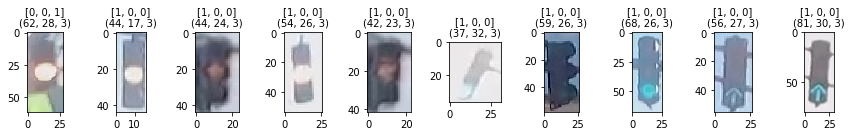

In [26]:
n_plots = min(n_misclassified, 10)
tlc_training.visualize_image_sample(list_name='misclassified', randomize=False, n_plots=n_plots)

## Use test images

In [36]:
tlc_test = TrafficLightClassifier(IMAGE_LIST['test'])
tlc_training.classify_images(methods=['brightness'])
n_misclassified = tlc_test.get_num_misclassifed()
print('Number of misclassifed images =', n_misclassified)
print('Accuracy = {:.1f} %'.format(tlc_test.get_accuracy() * 100))

Number of misclassifed images = 16
Accuracy = 94.6 %


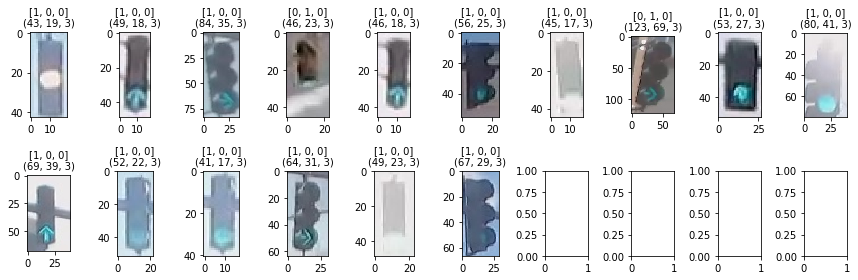

In [28]:
n_plots = min(n_misclassified, 20)
tlc_test.visualize_image_sample(list_name='misclassified', randomize=False, n_plots=n_plots)

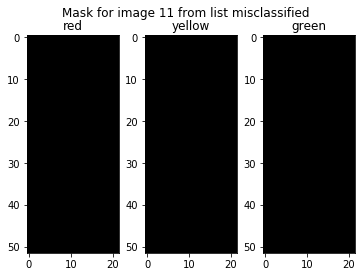

In [29]:
tlc_test.visualize_masks(11, list_name='misclassified')

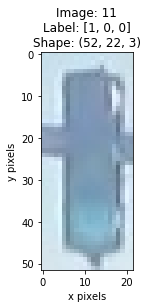

In [30]:
tlc_test.visualize_image(11, list_name='misclassified')

### Train classifier

In [31]:
# tlc_test.train_classifier(IMAGE_LIST['training'])

In [32]:
# tlc_training.plot_effect_of_sv_thresholds()